In [1]:
import keras.backend as K
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

def draw_image_with_label(img, label, prediction=None):
    theta = label * 0.69 #Steering range for the car is +- 40 degrees -> 0.69 radians
    line_length = 50
    line_thickness = 3
    label_line_color = (0, 0, 255)
    prediction_line_color = (255, 0, 0)
    print('Actual Steering Angle = {0}'.format(label))
    draw_image = img.copy()
    first_point = (int(img.shape[1]/2),img.shape[0])
    second_point = (int((img.shape[1]/2) + (line_length * math.sin(theta))), int(img.shape[0] - (line_length * math.cos(theta))))
    # image_draw.line([first_point, second_point], fill=label_line_color, width=line_thickness)
    cv2.line(draw_image, first_point, second_point, label_line_color, line_thickness)
    
    if (prediction is not None):
        print('Predicted Steering Angle = {0}'.format(prediction))
        print('L1 Error: {0}'.format(abs(prediction-label)))
        theta = prediction * 0.69
        second_point = (int((img.shape[1]/2) + (line_length * math.sin(theta))), int(img.shape[0] - (line_length * math.cos(theta))))
        # image_draw.line([first_point, second_point], fill=prediction_line_color, width=line_thickness)
        cv2.line(draw_image, first_point, second_point, prediction_line_color, line_thickness)
    
    plt.imshow(cv2.cvtColor(draw_image, cv2.COLOR_BGR2RGB))
    plt.show()
    del draw_image

Using TensorFlow backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_1 (Cropping2D)        (None, 75, 320, 3)    0           cropping2d_input_2[0][0]         
____________________________________________________________________________________________________
lambda_1 (Lambda)                (None, 75, 320, 3)    0           cropping2d_1[0][0]               
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 36, 158, 24)   1824        lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 16, 77, 36)    21636       convolution2d_1[0][0]            
___________________________________________________________________________________________

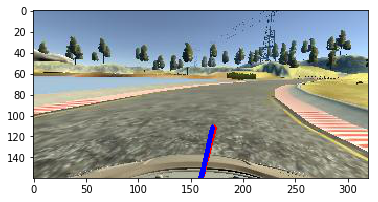

Actual Steering Angle = -0.2105263
Predicted Steering Angle = -0.24158887565135956
L1 Error: 0.03106257565135956


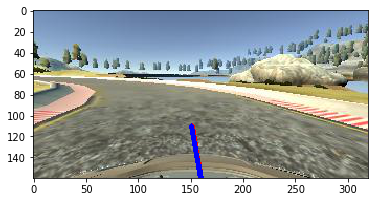

Actual Steering Angle = -0.1052632
Predicted Steering Angle = -0.06591269373893738
L1 Error: 0.03935050626106262


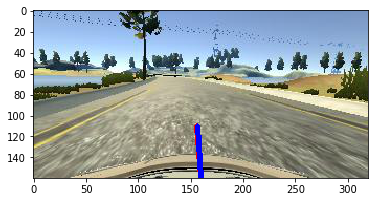

Actual Steering Angle = 0.1052632
Predicted Steering Angle = 0.11130985617637634
L1 Error: 0.0060466561763763416


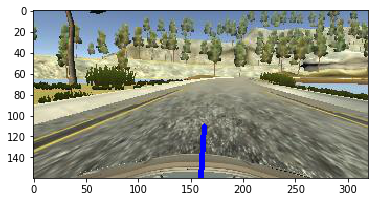

Actual Steering Angle = -0.4210526
Predicted Steering Angle = -0.19296088814735413
L1 Error: 0.22809171185264587


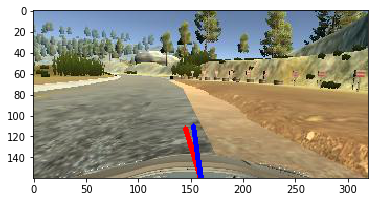

Actual Steering Angle = -0.1203007
Predicted Steering Angle = -0.2177220731973648
L1 Error: 0.09742137319736481


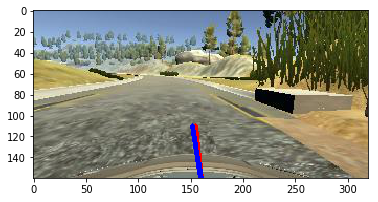

Actual Steering Angle = 0.2255639
Predicted Steering Angle = 0.04676561430096626
L1 Error: 0.17879828569903375


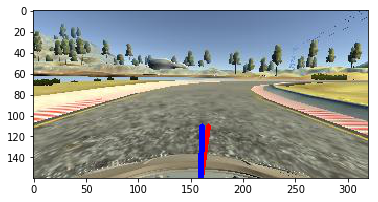

Actual Steering Angle = -0.2481203
Predicted Steering Angle = -0.2167222946882248
L1 Error: 0.031398005311775196


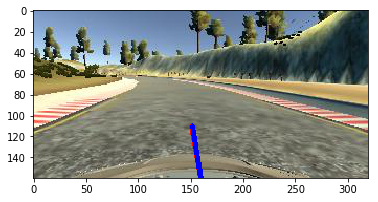

Actual Steering Angle = -0.2255639
Predicted Steering Angle = -0.24065466225147247
L1 Error: 0.015090762251472462


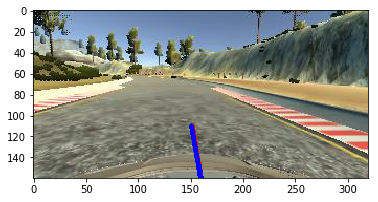

Actual Steering Angle = 0.2626991
Predicted Steering Angle = 0.0823574960231781
L1 Error: 0.18034160397682192


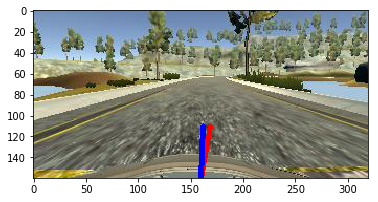

Actual Steering Angle = -0.1729323
Predicted Steering Angle = -0.17865170538425446
L1 Error: 0.0057194053842544446


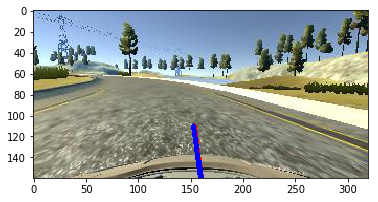

Actual Steering Angle = 0.1670138
Predicted Steering Angle = 0.11372163146734238
L1 Error: 0.05329216853265761


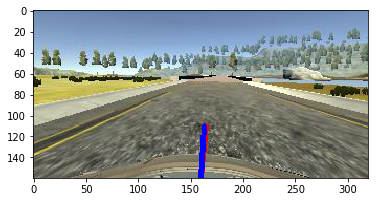

Actual Steering Angle = -0.1452064
Predicted Steering Angle = -0.14436495304107666
L1 Error: 0.0008414469589233531


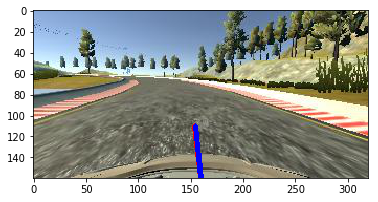

Actual Steering Angle = -0.1428571
Predicted Steering Angle = -0.15992535650730133
L1 Error: 0.017068256507301344


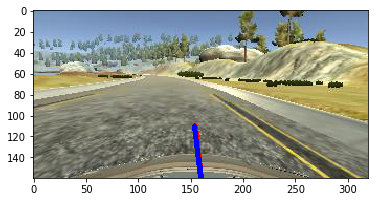

Actual Steering Angle = 0.1729323
Predicted Steering Angle = 0.013344334438443184
L1 Error: 0.15958796556155683


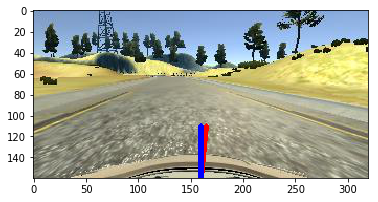

Actual Steering Angle = 0.1353384
Predicted Steering Angle = 0.07973478734493256
L1 Error: 0.05560361265506744


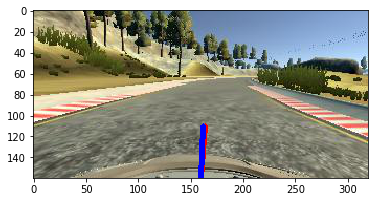

Actual Steering Angle = 0.3009732
Predicted Steering Angle = 0.10896463692188263
L1 Error: 0.19200856307811737


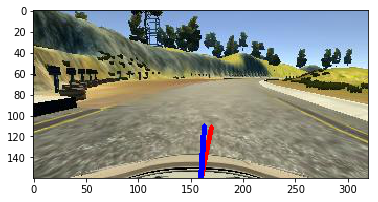

Actual Steering Angle = -0.1052632
Predicted Steering Angle = -0.12372864782810211
L1 Error: 0.01846544782810211


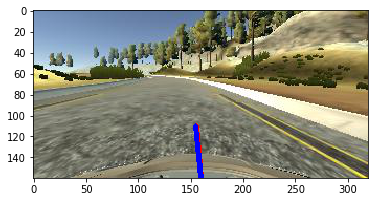

Actual Steering Angle = 0.4887218
Predicted Steering Angle = 0.24053898453712463
L1 Error: 0.24818281546287535


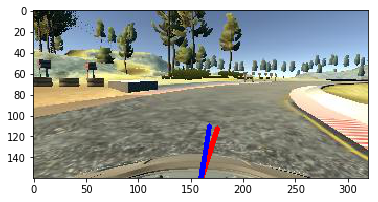

Actual Steering Angle = -0.2330827
Predicted Steering Angle = -0.12446126341819763
L1 Error: 0.10862143658180237


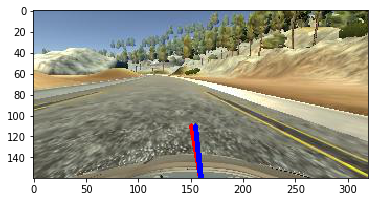

In [10]:
import os
import csv
import cv2
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from keras.models import load_model

samples = []
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader, None)  # skip the headers
    for line in reader:
        samples.append(line)

train_samples, validation_samples = train_test_split(samples, test_size=0.2)

# define generator
def generator(samples, batch_size=32):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        images = []
        angles = []
        batch_samples = resample(samples, n_samples=batch_size)

        for batch_sample in batch_samples:
            name = './data/IMG/'+batch_sample[0].split('\\')[-1]
            center_image = cv2.imread(name)
            center_angle = float(batch_sample[3])
            images.append(center_image)
            angles.append(center_angle)

        # trim image to only see section with road
        X_train = np.array(images)
        y_train = np.array(angles)
        yield X_train, y_train

# compile and train the model using the generator function
validation_generator = generator(validation_samples, batch_size=100)
sample_batch_validation_data_X, sample_batch_validation_data_y = next(validation_generator)
sel = abs(sample_batch_validation_data_y)>0.1
images = sample_batch_validation_data_X[sel]
angles = sample_batch_validation_data_y[sel]

model_file = "model_nvidia.h5"
model = load_model(model_file)
model.summary()

for i in range(20):
    image = images[i]
    angle = angles[i]
    angle_predict = float(model.predict(image[None,:,:,:], batch_size=1))
    draw_image_with_label(image, angle, angle_predict)

In [11]:
images = []
angles = []

for sample in samples:
    name = './data/IMG/'+sample[0].split('\\')[-1]
    center_image = cv2.imread(name)
    center_angle = float(sample[3])
    images.append(center_image)
    angles.append(center_angle)

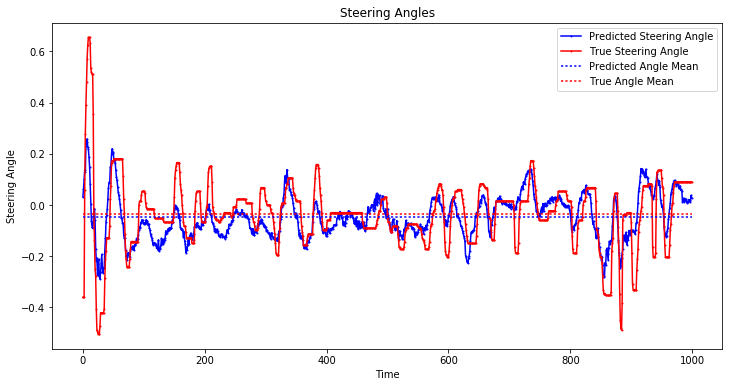

In [35]:
X = np.array(images[8036:8036+1000])
y_hat = model.predict(X)
y = angles[8036:8036+1000]
plot_index = np.array(range(1000))

plt.figure(figsize=(12, 6))
plt.plot(plot_index , y_hat , 'b-o', markersize=1, label='Predicted Steering Angle')
plt.plot(plot_index , y, 'r-o', markersize=1, label='True Steering Angle')
plt.plot([plot_index[0],plot_index[-1]], [np.mean(y_hat),np.mean(y_hat)], 'b:', label='Predicted Angle Mean')
plt.plot([plot_index[0],plot_index[-1]], [np.mean(y),np.mean(y)], 'r:', label='True Angle Mean')
plt.legend(loc='upper right');
plt.title('Steering Angles')
plt.xlabel('Time')
plt.ylabel('Steering Angle')
plt.show()

In [34]:
len(images)

8036

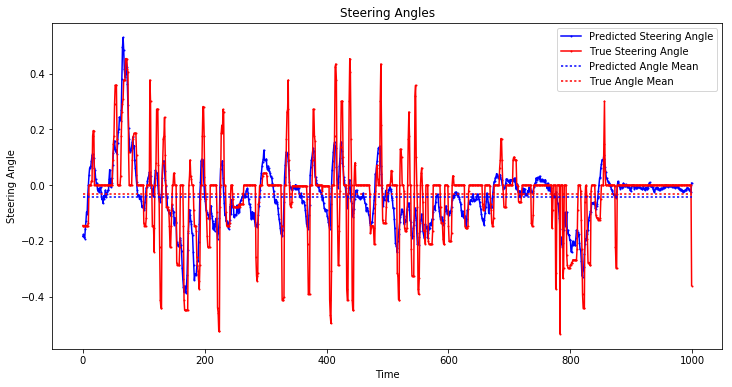

In [37]:
X = np.array(images[8036-1000:8036])
y_hat = model.predict(X)
y = angles[8036-1000:8036]
plot_index = np.array(range(1000))

plt.figure(figsize=(12, 6))
plt.plot(plot_index , y_hat , 'b-o', markersize=1, label='Predicted Steering Angle')
plt.plot(plot_index , y, 'r-o', markersize=1, label='True Steering Angle')
plt.plot([plot_index[0],plot_index[-1]], [np.mean(y_hat),np.mean(y_hat)], 'b:', label='Predicted Angle Mean')
plt.plot([plot_index[0],plot_index[-1]], [np.mean(y),np.mean(y)], 'r:', label='True Angle Mean')
plt.legend(loc='upper right');
plt.title('Steering Angles')
plt.xlabel('Time')
plt.ylabel('Steering Angle')
plt.show()

In [7]:
len(images)

37852

In [ ]:
angles_predict = model.predict(np.array(images))


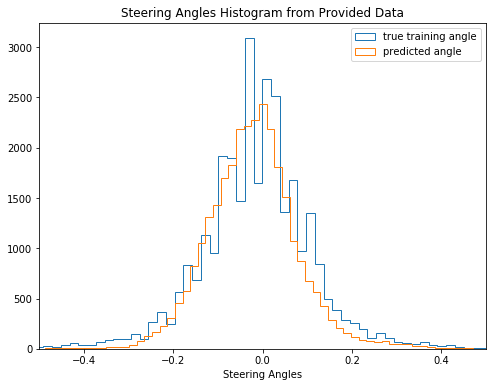

In [47]:
plt.figure(figsize=(8, 6))
plt.hist(angles[8036:], bins = 100, histtype='step', label=['true training angle'])
plt.hist(angles_predict[8036:], bins = 100, histtype='step', label=['predicted angle'])
plt.legend(loc='upper right');
plt.xlim(-0.5,0.5)
plt.title('Steering Angles Histogram from Provided Data')
plt.xlabel('Steering Angles')
plt.ylabel('')
plt.show()

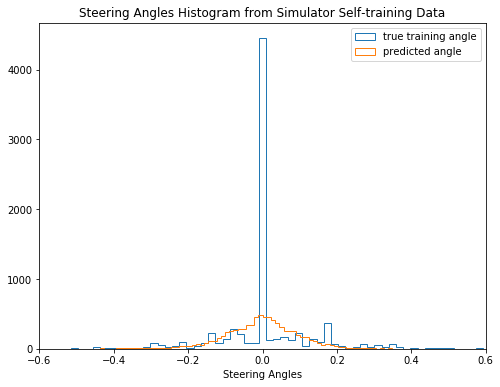

In [48]:
plt.figure(figsize=(8, 6))
plt.hist(angles[:8036], bins = 100, histtype='step', label=['true training angle'])
plt.hist(angles_predict[:8036], bins = 100, histtype='step', label=['predicted angle'])
plt.legend(loc='upper right');
plt.xlim(-0.6,0.6)
plt.title('Steering Angles Histogram from Simulator Self-training Data')
plt.xlabel('Steering Angles')
plt.ylabel('')
plt.show()

In [49]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_1 (Cropping2D)        (None, 75, 320, 3)    0           cropping2d_input_2[0][0]         
____________________________________________________________________________________________________
lambda_1 (Lambda)                (None, 75, 320, 3)    0           cropping2d_1[0][0]               
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 36, 158, 24)   1824        lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 16, 77, 36)    21636       convolution2d_1[0][0]            
___________________________________________________________________________________________